In [10]:
import cv2
import tensorflow as tf

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [42]:
import os
os.chdir('/content/gdrive/MyDrive/fruit')

In [43]:
DATADIR = 'dataset/test'
CATAGORIES = ["freshapples","rottenapples"]



In [44]:
def prepare(filepath):
    IMG_SIZE = 50
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(new_array)
    plt.show()

    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [45]:
model = tf.keras.models.load_model("onefruit-cnn.model")

  0%|          | 0/398 [00:00<?, ?it/s]

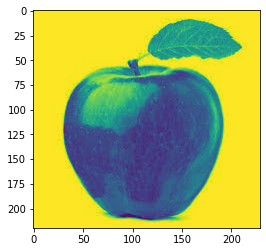

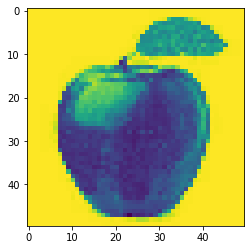

  0%|          | 0/398 [00:00<?, ?it/s]

[[0.]]
fresh


In [66]:
from tqdm import tqdm
import matplotlib.pyplot as plt
count = 1
path = os.path.join(DATADIR,CATAGORIES[0])
for img in tqdm(os.listdir(path)):   
  
  #prediction = model.predict([prepare(os.path.join(path,img))])
  #test your own image
  prediction = model.predict([prepare('fapple.jpg')])
  print(prediction) 
  if int(prediction[0][0]) == 1:
    print("rotten")
  else:
    print("fresh")
  
  break
  


In [21]:

testing_data = []
IMG_SIZE = 50

CATEGORIES = ["freshapples","rottenapples"]
def create_testing_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
           
create_testing_data()

print(len(testing_data))

100%|██████████| 601/601 [06:50<00:00,  1.46it/s]

999


In [22]:
import random

random.shuffle(testing_data)
X = []
y = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
import pickle

pickle_out = open("ATXNS.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("atyns.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [52]:
import pickle
pickle_in = open("ATXNS.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("atyns.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0
y=np.array(y)


In [53]:
history = model.fit(X, y, batch_size=128)

8/8 [==============================] - 4s 385ms/step - loss: 0.8175 - accuracy: 0.7117


In [54]:
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

8/8 [==============================] - 1s 102ms/step - loss: 0.4814 - accuracy: 0.7828
test loss, test acc: [0.48136964440345764, 0.782782793045044]


In [58]:
from tqdm import tqdm
import matplotlib.pyplot as plt
count = 1
pred = []

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)  
  print(path)
  for img in tqdm(os.listdir(path)):   
    #prediction = model.predict([prepare(os.path.join(path,img))])
    #prediction = model.predict([prepare('samples/fapp.jpg')])
    #print(prediction) 
    if int(prediction[0][0]) == 1:
      pred.append("Rotten apple")
    else:
      pred.append("Fresh apple")

  
  
  

100%|██████████| 601/601 [00:00<00:00, 277374.20it/s]

dataset/test/freshapples
dataset/test/rottenapples


In [59]:
print(pred[:10])

['Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple', 'Fresh apple']


In [60]:
import random

#random.shuffle(testing_data)
X = []
y = []
actual = []
import numpy as np
for features,label in testing_data:
    X.append(features)
    y.append(label)
print(y[900:])
for i in y:
  if i == 1:
      actual.append("Rotten apple")
  else:
      actual.append("Fresh apple")
print(actual[:10])

[1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1]
['Rotten apple', 'Rotten apple', 'Fresh apple', 'Fresh apple', 'Rotten apple', 'Rotten apple', 'Rotten apple', 'Rotten apple', 'Rotten apple', 'Rotten apple']


In [61]:
import csv
import pandas as pd

fruits = {'Actual Fruit': actual,
        'Predicted Fruit': pred
        }

df = pd.DataFrame(fruits, columns= ['Actual Fruit', 'Predicted Fruit'])

In [62]:
df.head()

,Actual Fruit,Predicted Fruit
0,Rotten apple,Fresh apple
1,Rotten apple,Fresh apple
2,Fresh apple,Fresh apple
3,Fresh apple,Fresh apple
4,Rotten apple,Fresh apple


In [63]:
from sklearn.utils import shuffle
df = shuffle(df)

In [64]:
df.head()

,Actual Fruit,Predicted Fruit
161,Rotten apple,Fresh apple
407,Rotten apple,Fresh apple
275,Fresh apple,Fresh apple
15,Rotten apple,Fresh apple
697,Fresh apple,Fresh apple


In [65]:
df.to_csv("ClassifiedFruits.csv")